## Aprendizaje Automático
Ejercicios Tema 2

# 1. Calcular las primeras derivadas parciales de:
$$
f(x, y) = \sqrt{x^2 + y^2}
$$


In [1]:
import sympy as sp

# Definir variables
x, y = sp.symbols('x y')

# Definir función
f = sp.sqrt(x**2 + y**2)

# Derivadas parciales
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("Derivada parcial de x:",df_dx,"\nDerivada parcial de y:", df_dy)


Derivada parcial de x: x/sqrt(x**2 + y**2) 
Derivada parcial de y: y/sqrt(x**2 + y**2)


# 2. Encontrar el mínimo local para la función
$$
y = (x+5)^2
$$

In [2]:
import sympy as sp

# Definir variable y función
x = sp.symbols('x')
y = (x + 5)**2

# Derivada
dy_dx = sp.diff(y, x)

# Resolver dy/dx = 0
critico = sp.solve(dy_dx, x)

# Evaluar la función en el punto crítico
min_val = y.subs(x, critico[0]) # calculamos la y

print("El minimo local esta en el punto: (",critico[0], ", ",min_val,")")


El minimo local esta en el punto: ( -5 ,  0 )


# 3. Dada la siguiente tabla de medidas:

| X | 1   | 2   | 3   |
|---|-----|-----|-----|
| Y | 1.5 | 2   | 2.5 |

a) Dibujar la tabla como una gráfica de puntos.

b) Calcular los coeficientes mediante ecuaciones normales.

c) Dibujar la recta de regresión encima de los puntos.

d) Calcular los distintos errores.


a) Dibujar la tabla como una gráfica de puntos.


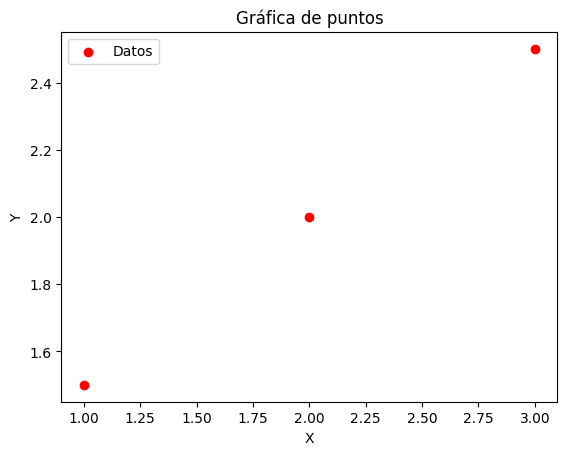

b) Calcular los coeficientes mediante ecuaciones normales.
Coeficientes:
a (intercepto) = 0.9999999999999982
b (pendiente)  = 0.5

c) Dibujar la recta de regresión encima de los puntos.


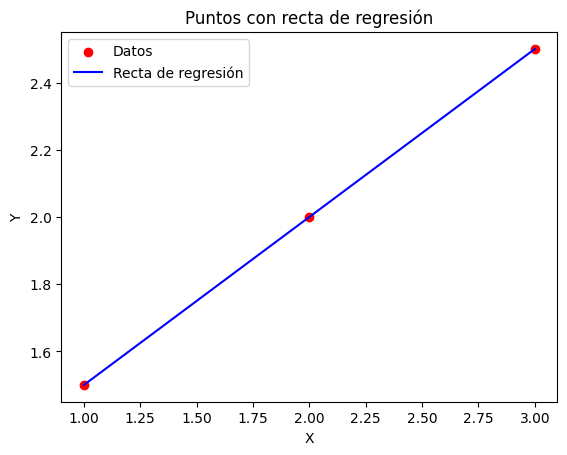

d) Calcular los distintos errores.
Errores:
SSE  = 0.0000
MSE  = 0.0000
RMSE = 0.0000
R^2  = 1.0000


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
X = np.array([1, 2, 3])
Y = np.array([1.5, 2.0, 2.5])

print("a) Dibujar la tabla como una gráfica de puntos.")
plt.scatter(X, Y, color="red", label="Datos")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gráfica de puntos")
plt.legend()
plt.show()

print("b) Calcular los coeficientes mediante ecuaciones normales.")
A = np.vstack([np.ones(len(X)), X]).T
beta = np.linalg.inv(A.T @ A) @ (A.T @ Y)
a, b = beta
print("Coeficientes:")
print(f"a (intercepto) = {a}")
print(f"b (pendiente)  = {b}\n")

print("c) Dibujar la recta de regresión encima de los puntos.")
plt.scatter(X, Y, color="red", label="Datos")
x_line = np.linspace(min(X), max(X), 100)
y_line = a + b * x_line
plt.plot(x_line, y_line, color="blue", label="Recta de regresión")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Puntos con recta de regresión")
plt.legend()
plt.show()

print("d) Calcular los distintos errores.")
Y_pred = a + b * X
residuos = Y - Y_pred
SSE = np.sum(residuos**2)
MSE = SSE / len(X)
RMSE = np.sqrt(MSE)
R2 = 1 - (SSE / np.sum((Y - np.mean(Y))**2))

print("Errores:")
print(f"SSE  = {SSE:.4f}")
print(f"MSE  = {MSE:.4f}")
print(f"RMSE = {RMSE:.4f}")
print(f"R^2  = {R2:.4f}")


# 4. Tenemos la siguiente tabla:
| X | 0  | 1  | 2  | 3  | 4  |
|---|----|----|----|----|----|
| Y | 2  | 3  | 5  | 4  | 6  |

a) Encontrar la regresión lineal y = ax + b

b) Estimar los valores de y cuando x = -2, x=2.5 y x=10

In [4]:
import numpy as np

# Datos
X = np.array([0, 1, 2, 3, 4])
Y = np.array([2, 3, 5, 4, 6])

print("a) Encontrar la regresión lineal y = ax + b")
n = len(X)
x_mean = np.mean(X)
y_mean = np.mean(Y)

# Pendiente (a)
a = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean)**2)

# Intercepto (b)
b = y_mean - a * x_mean

print("Ecuación de la regresión:")
print(f"y = {a:.4f}x + {b:.4f}")

print("\nb) Estimar los valores de y cuando x = -2, x=2.5 y x=10")
X_new = np.array([-2, 2.5, 10])
Y_pred = a * X_new + b

for x_val, y_val in zip(X_new, Y_pred):
    print(f"Para x = {x_val}, y estimado = {y_val:.4f}")


a) Encontrar la regresión lineal y = ax + b
Ecuación de la regresión:
y = 0.9000x + 2.2000

b) Estimar los valores de y cuando x = -2, x=2.5 y x=10
Para x = -2.0, y estimado = 0.4000
Para x = 2.5, y estimado = 4.4500
Para x = 10.0, y estimado = 11.2000


# 5. Se ha realizado un estudio para determinar la pédida de actividad de una droga. la siguiente tabla muestra los resultados de los experimentos.

| Tiempo    | 1  | 2  | 3  | 4  | 5  |
|-----------|----|----|----|----|----|
| Actividad | 96 | 84 | 70 | 58 | 52 |

a) Construir el modelo lineal de la actividad en función del tiempo.

b) A partir del modelo, ¿cuándo será la actividad del 80%?

c) Cuándo perderá la droga toda la actividad?

In [5]:
import numpy as np

# Datos
T = np.array([1, 2, 3, 4, 5])       # Tiempo
A = np.array([96, 84, 70, 58, 52])  # Actividad

print("a) Construir el modelo lineal de la actividad en función del tiempo.")
n = len(T)
t_mean = np.mean(T)
a_mean = np.mean(A)

# Pendiente a
a = np.sum((T - t_mean) * (A - a_mean)) / np.sum((T - t_mean)**2)

# Intercepto b
b = a_mean - a * t_mean

print(f"Modelo lineal: Actividad = {a:.4f} * t + {b:.4f}")

print("\nb) A partir del modelo, ¿cuándo será la actividad del 80%?")
t_80 = (80 - b) / a
print(f"La actividad será del 80% cuando t = {t_80:.2f}")

print("\nc) Cuándo perderá la droga toda la actividad?")
t_0 = (0 - b) / a
print(f"La droga perderá toda actividad cuando t = {t_0:.2f}")


a) Construir el modelo lineal de la actividad en función del tiempo.
Modelo lineal: Actividad = -11.4000 * t + 106.2000

b) A partir del modelo, ¿cuándo será la actividad del 80%?
La actividad será del 80% cuando t = 2.30

c) Cuándo perderá la droga toda la actividad?
La droga perderá toda actividad cuando t = 9.32


# 6. Un equipo de baloncesto está probando un nuevo programa de estiraminetos para reducir las lesiones. Los datos siguientes muestran el numero de minutos diarios realizando estiramientos y las lesiones a lo largo del año.

| Minutos  | 0  | 30 | 10 | 15 | 5  | 25 | 35 | 40 |
|----------|----|----|----|----|----|----|----|----|
| Lesiones | 4  | 1  | 2  | 2  | 3  | 1  | 0  | 1  |

a) Construya la línea de regresión del número de lesiones en función del estiramiento(mins).

b) ¿Cuánto es la reduccioón de lesiones por cada minuto de estiramiento?

c) ¿Cuántos minutos de estiramiento se requieren para no tener lesiones?

In [6]:
import numpy as np

# Datos
X = np.array([0, 30, 10, 15, 5, 25, 35, 40])
Y = np.array([4, 1, 2, 2, 3, 1, 0, 1])

print("a) Construya la línea de regresión del número de lesiones en función del estiramiento(mins).")
n = len(X)
x_mean = np.mean(X)
y_mean = np.mean(Y)

# Pendiente (a)
a = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean)**2)

# Intercepto (b)
b = y_mean - a * x_mean

print(f"Modelo lineal: Lesiones = {a:.4f} * Minutos + {b:.4f}")

print("\nb)¿Cuánto es la reducción de lesiones por cada minuto de estiramiento?")
print(f"Reducción de lesiones por cada minuto de estiramiento: {a:.4f}")

print("\nc) ¿Cuántos minutos de estiramiento se requieren para no tener lesiones?")
if a != 0:
    minutos_cero = (0 - b) / a
    print(f"Se requieren {minutos_cero:.2f} minutos de estiramiento para no tener lesiones")
else:
    print("La pendiente es cero: no hay relación entre estiramientos y lesiones.")


a) Construya la línea de regresión del número de lesiones en función del estiramiento(mins).
Modelo lineal: Lesiones = -0.0800 * Minutos + 3.3500

b)¿Cuánto es la reducción de lesiones por cada minuto de estiramiento?
Reducción de lesiones por cada minuto de estiramiento: -0.0800

c) ¿Cuántos minutos de estiramiento se requieren para no tener lesiones?
Se requieren 41.88 minutos de estiramiento para no tener lesiones


# 7. Genera y representa los datos (valores x e y) para una línea recta simple de la forma y = a + βx, donde a = 2 y β = 1 son constantes, y x ∈ [0, 1].

x = 0.00, y = 2.00
x = 0.02, y = 2.02
x = 0.04, y = 2.04
x = 0.06, y = 2.06
x = 0.08, y = 2.08
x = 0.10, y = 2.10
x = 0.12, y = 2.12
x = 0.14, y = 2.14
x = 0.16, y = 2.16
x = 0.18, y = 2.18
x = 0.20, y = 2.20
x = 0.22, y = 2.22
x = 0.24, y = 2.24
x = 0.27, y = 2.27
x = 0.29, y = 2.29
x = 0.31, y = 2.31
x = 0.33, y = 2.33
x = 0.35, y = 2.35
x = 0.37, y = 2.37
x = 0.39, y = 2.39
x = 0.41, y = 2.41
x = 0.43, y = 2.43
x = 0.45, y = 2.45
x = 0.47, y = 2.47
x = 0.49, y = 2.49
x = 0.51, y = 2.51
x = 0.53, y = 2.53
x = 0.55, y = 2.55
x = 0.57, y = 2.57
x = 0.59, y = 2.59
x = 0.61, y = 2.61
x = 0.63, y = 2.63
x = 0.65, y = 2.65
x = 0.67, y = 2.67
x = 0.69, y = 2.69
x = 0.71, y = 2.71
x = 0.73, y = 2.73
x = 0.76, y = 2.76
x = 0.78, y = 2.78
x = 0.80, y = 2.80
x = 0.82, y = 2.82
x = 0.84, y = 2.84
x = 0.86, y = 2.86
x = 0.88, y = 2.88
x = 0.90, y = 2.90
x = 0.92, y = 2.92
x = 0.94, y = 2.94
x = 0.96, y = 2.96
x = 0.98, y = 2.98
x = 1.00, y = 3.00


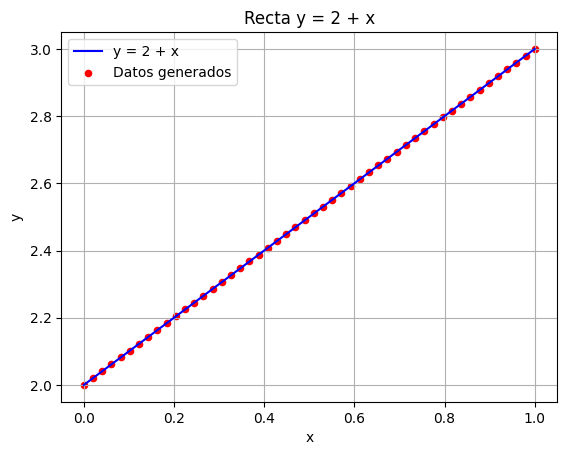

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
a = 2
beta = 1

# Generar valores de x en [0,1]
x = np.linspace(0, 1, 50)   # 50 puntos entre 0 y 1
y = a + beta * x

# Mostrar datos generados
for xi, yi in zip(x, y):
    print(f"x = {xi:.2f}, y = {yi:.2f}")

# Graficar
plt.plot(x, y, label="y = 2 + x", color="blue")
plt.scatter(x, y, color="red", s=20, label="Datos generados")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Recta y = 2 + x")
plt.legend()
plt.grid(True)
plt.show()


# 8. Repetir el ejercicio 3 aplicando el algoritmo de descenso por gradiente

a) Si comenzamos con theta0 = 0 y theta1=0, ¿Cúal es el valor inicial para la función de Pérdida (error cuadrático)?

b) Calcular la siguiente estimación para los valores de theta, despúes de 1 iteracion

In [8]:
import numpy as np

# Datos
X = np.array([1, 2, 3])
Y = np.array([1.5, 2.0, 2.5])
m = len(X)

print("a) Si comenzamos con theta0 = 0 y theta1=0, ¿Cúal es el valor inicial para la función de Pérdida (error cuadrático)?")
theta0 = 0.0
theta1 = 0.0

# Función de pérdida
def loss(theta0, theta1, X, Y):
    preds = theta0 + theta1 * X
    return (1/(2*len(X))) * np.sum((preds - Y)**2)

# Valor inicial de la pérdida
J_init = loss(theta0, theta1, X, Y)
print(f"Valor inicial de la función de pérdida: J(0,0) = {J_init:.4f}")

print("\nb) Calcular la siguiente estimación para los valores de theta, despúes de 1 iteracion")
alpha = 0.1  # tasa de aprendizaje

# Predicciones iniciales
preds = theta0 + theta1 * X
errors = preds - Y

# Gradientes
dtheta0 = (1/m) * np.sum(errors)
dtheta1 = (1/m) * np.sum(errors * X)

# Actualización
theta0_new = theta0 - alpha * dtheta0
theta1_new = theta1 - alpha * dtheta1

print(f"Después de 1 iteración:")
print(f"theta0 = {theta0_new:.4f}")
print(f"theta1 = {theta1_new:.4f}")


a) Si comenzamos con theta0 = 0 y theta1=0, ¿Cúal es el valor inicial para la función de Pérdida (error cuadrático)?
Valor inicial de la función de pérdida: J(0,0) = 2.0833

b) Calcular la siguiente estimación para los valores de theta, despúes de 1 iteracion
Después de 1 iteración:
theta0 = 0.2000
theta1 = 0.4333


# 9. ¿Qué puede suceder si la tasa de aprendizaje es demasiado alta o demasiado baja?

Solucion:

En descenso por gradiente, la tasa de aprendizaje (𝛼) controla el tamaño de los pasos con los que el modelo ajusta sus parámetros: si es demasiado baja, el algoritmo converge muy lentamente y puede necesitar muchísimas iteraciones para acercarse al mínimo; si es demasiado alta, los pasos son tan grandes que el modelo puede oscilar alrededor del mínimo o incluso divergir, aumentando el error en lugar de reducirlo.

# 10. ¿Cómo actualiza el algoritmo de descenso por gradiente los theta?

Solucion:
En el algoritmo de descenso por gradiente, los parametros theta se actualizan en cada iteracion restando una fraccion del gradiente de la funcion de perdida:

thetaj := thetaj - alpha * dJ(theta)/dthetaj

donde alpha es la tasa de aprendizaje.  
En el caso de la regresion lineal, esto significa que:

- theta0 (intercepto) se ajusta restando el promedio del error.  
- theta1 (pendiente) se ajusta restando el promedio del error multiplicado por cada valor de x.  

De esta forma, los parametros van acercandose gradualmente al minimo de la funcion de perdida.


# 11. Sean los siguientes datos de personas:

height = 1.7m weight = 80kg

height = 1.8m weight = 79kg

height = 1.6m weight = 60kg

a) ¿Cuál es el valor de la función de costo cuando theta0 y theta1 son ambos iguales a 0?

b) ¿Cuál es su valor cuando theta0=1 y theta1=2?

c) y despues de 1 iteración de descenso de gradiente?



In [9]:
import numpy as np

# Datos de altura (m) y peso (kg)
X = np.array([1.7, 1.8, 1.6])
Y = np.array([80, 79, 60])
m = len(X)

# Función de costo (MSE)
def cost(theta0, theta1, X, Y):
    preds = theta0 + theta1 * X
    return (1/(2*m)) * np.sum((preds - Y)**2)


print("a) Cuál es el valor de la función de costo cuando theta0 y theta1 son ambos iguales a 0?")
theta0 = 0
theta1 = 0
J_init = cost(theta0, theta1, X, Y)
print(f"Costo J(0,0) = {J_init:.4f}\n")


print("b) ¿Cuál es su valor cuando theta0=1 y theta1=2?")
theta0 = 1
theta1 = 2
J_val = cost(theta0, theta1, X, Y)
print(f"Costo J(1,2) = {J_val:.4f}\n")


print("c) ¿y despues de 1 iteración de descenso de gradiente?")
theta0 = 1
theta1 = 2
alpha = 0.01  # tasa de aprendizaje

# Gradientes
preds = theta0 + theta1 * X
errors = preds - Y
dtheta0 = (1/m) * np.sum(errors)
dtheta1 = (1/m) * np.sum(errors * X)

# Actualización de theta
theta0_new = theta0 - alpha * dtheta0
theta1_new = theta1 - alpha * dtheta1

print(f"theta0 después de 1 iteración = {theta0_new:.4f}")
print(f"theta1 después de 1 iteración = {theta1_new:.4f}")
print(f"Costo después de 1 iteración J = {cost(theta0_new, theta1_new, X, Y):.4f}")


a) Cuál es el valor de la función de costo cuando theta0 y theta1 son ambos iguales a 0?
Costo J(0,0) = 2706.8333

b) ¿Cuál es su valor cuando theta0=1 y theta1=2?
Costo J(1,2) = 2394.0600

c) ¿y despues de 1 iteración de descenso de gradiente?
theta0 después de 1 iteración = 1.6860
theta1 después de 1 iteración = 3.1724
Costo después de 1 iteración J = 2213.1415
